In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# import data
df = pd.read_csv("data/data.csv")

In [7]:
df.describe()

,rating,avg salary,age,sas_yn,spark_yn,python_yn,matlab_yn,excel_yn,jupyter_yn,sql_yn,spss_yn,desc_len,comp_num
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,3.731566,72.020707,33.131313,0.187879,0.039899,0.289899,0.010606,0.603030,0.005556,0.623737,0.072222,3147.619192,0.692929
std,0.670333,23.713243,46.187645,0.390714,0.195771,0.453830,0.102464,0.489393,0.074347,0.484570,0.258921,1883.463519,1.200745
min,1.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,3.300000,58.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1768.750000,0.000000
50%,3.700000,68.500000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2917.000000,0.000000
75%,4.100000,80.500000,38.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4146.000000,1.000000
max,5.000000,150.000000,338.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18664.000000,4.000000


In [8]:
df.columns

Index(['Job Title', 'Job Description', 'rating', 'company', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'avg salary', 'state', 'city', 'age', 'sas_yn',
       'spark_yn', 'python_yn', 'matlab_yn', 'excel_yn', 'jupyter_yn',
       'sql_yn', 'spss_yn', 'seniority', 'desc_len', 'comp_num'],
      dtype='object')

<AxesSubplot:>

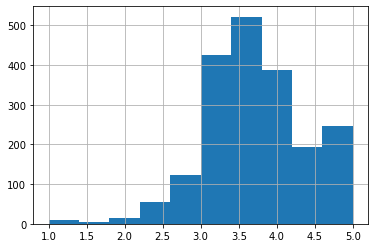

In [9]:
df.rating.hist()

<AxesSubplot:>

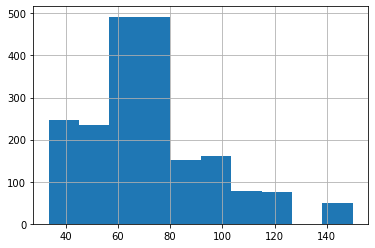

In [11]:
df["avg salary"].hist()

<AxesSubplot:>

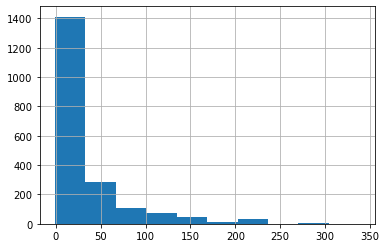

In [12]:
df.age.hist()

<AxesSubplot:>

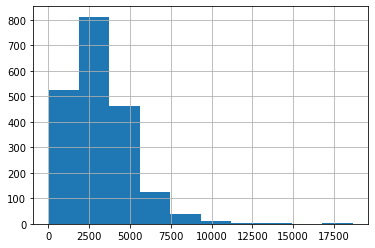

In [13]:
 df.desc_len.hist()

<AxesSubplot:>

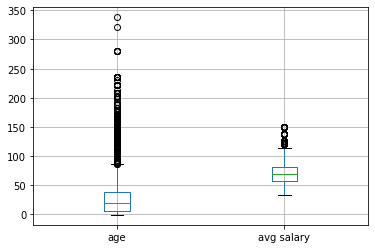

In [15]:
df.boxplot(column = ['age', 'avg salary'])

<AxesSubplot:>

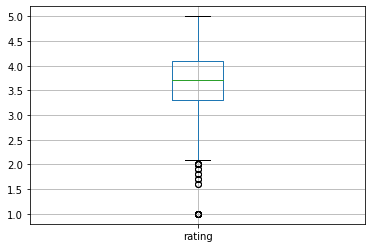

In [16]:
df.boxplot(column = 'rating')

In [19]:
df[['age', 'avg salary', 'desc_len', 'rating']].corr()

,age,avg salary,desc_len,rating
age,1.000000,-0.081181,0.266886,-0.104753
avg salary,-0.081181,1.000000,-0.029774,0.042560
desc_len,0.266886,-0.029774,1.000000,-0.156329
rating,-0.104753,0.042560,-0.156329,1.000000


In [20]:
df.columns

Index(['Job Title', 'Job Description', 'rating', 'company', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'avg salary', 'state', 'city', 'age', 'sas_yn',
       'spark_yn', 'python_yn', 'matlab_yn', 'excel_yn', 'jupyter_yn',
       'sql_yn', 'spss_yn', 'seniority', 'desc_len', 'comp_num'],
      dtype='object')

In [21]:
df_cat = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'state', 'city']]

graph for Size: total = 8


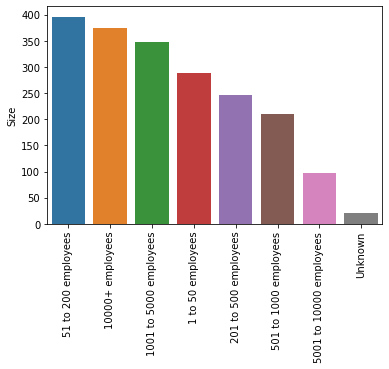

graph for Type of ownership: total = 14


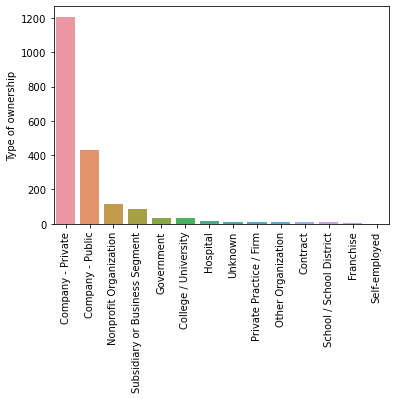

graph for Industry: total = 89


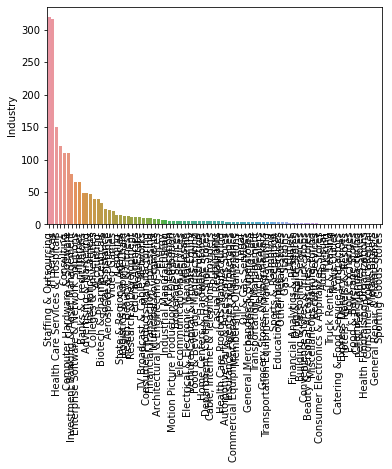

graph for Sector: total = 25


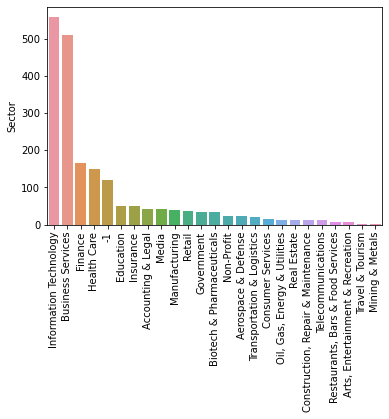

graph for Revenue: total = 13


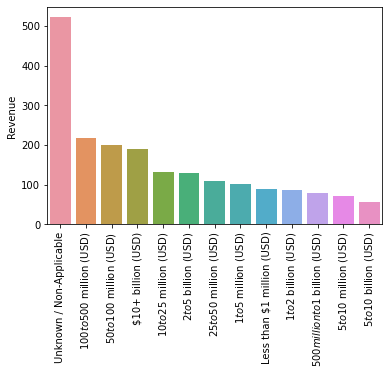

graph for state: total = 20


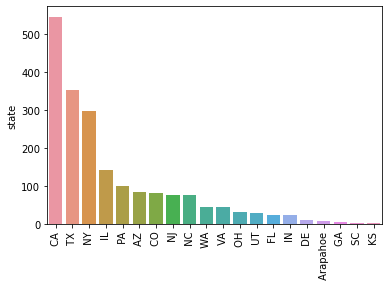

graph for city: total = 230


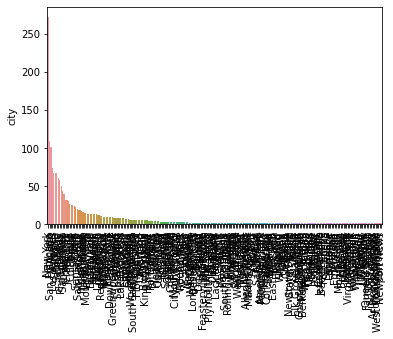

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

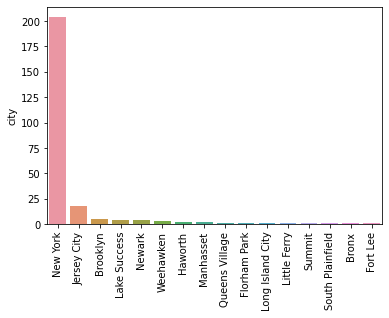

In [40]:
city = df_cat['city'][:250].value_counts()
chart = sns.barplot(x=city.index, y=city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [41]:
pd.pivot_table(df, index = 'seniority', values = 'avg salary')

,avg salary
seniority,
jr,63.458333
na,71.302922
senior,74.843458


In [45]:
pd.pivot_table(df, index = 'state', values = 'avg salary').sort_values('avg salary', ascending = False)

,avg salary
state,
CA,89.107861
IL,77.517606
CO,73.115854
NJ,72.655844
Arapahoe,72.250000
NY,71.380872
AZ,70.957831
SC,68.333333
NC,67.727273


In [49]:
pd.pivot_table(df, index = 'city', values = 'avg salary').sort_values('avg salary', ascending = False)[:20]

,avg salary
city,
Marin City,126.000000
Daly City,126.000000
Los Gatos,122.666667
Whittier,122.500000
Arcadia,122.500000
Pico Rivera,122.500000
Berkeley,115.500000
Northfield,113.000000
Glenview,113.000000


In [50]:
df.columns

Index(['Job Title', 'Job Description', 'rating', 'company', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'avg salary', 'state', 'city', 'age', 'sas_yn',
       'spark_yn', 'python_yn', 'matlab_yn', 'excel_yn', 'jupyter_yn',
       'sql_yn', 'spss_yn', 'seniority', 'desc_len', 'comp_num'],
      dtype='object')

In [66]:
pd.pivot_table(df, index = 'company', values = 'avg salary').sort_values('avg salary', ascending = False)[:20]

,avg salary
company,
OSI Engineerin,150.0
Risk Management Solutions (RMS,150.0
Netfli,150.0
Enjo,150.0
"Iconma, L.L.C",150.0
Zipong,150.0
Ursu,150.0
Nur,150.0
Altery,150.0


In [68]:
pd.pivot_table(df, index = 'Sector', values = 'avg salary').sort_values('avg salary', ascending = False)[:20]

,avg salary
Sector,
Real Estate,85.227273
Biotech & Pharmaceuticals,83.106061
"Arts, Entertainment & Recreation",80.642857
Accounting & Legal,75.220930
Information Technology,74.301971
"Construction, Repair & Maintenance",73.636364
Health Care,72.833333
-1,72.533058
Manufacturing,72.075000


In [69]:
pd.pivot_table(df, index = 'Industry', values = 'avg salary').sort_values('avg salary', ascending = False)[:20]

,avg salary
Industry,
Drug & Health Stores,95.250000
Education Training Services,92.833333
Health Care Products Manufacturing,89.800000
Sports & Recreation,88.166667
Gambling,88.000000
News Outlet,87.000000
Real Estate,85.227273
General Repair & Maintenance,85.000000
Transportation Equipment Manufacturing,85.000000


In [70]:
from wordcloud import WordCloud

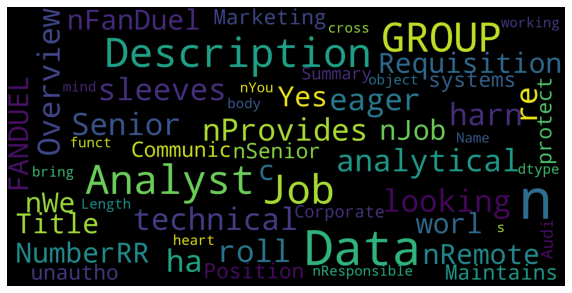

In [72]:
def wordcloud(data):
    wordcloud = WordCloud(background_color = 'Black',
                         max_words = 200,
                         max_font_size = 40,
                         scale = 5,
                         random_state = 5).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(df["Job Description"]) 